# Propser Loan Dataset Exploration
## by Cristina Woodings


## Table of Contents
<ul>
<li><a href="#preliminary">Preliminary Wrangling</a></li>    
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>   
<li><a href="#multi">Multivariate Exploration</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>


Prosper is a peer to peer personal loan company. They tailor small loans for anything from consolidating debt to home improvement. This particular data set contains over 100,000 loans with 81 pieces of information on each loan. The loans are from between 2005 and 2014 and the loan term ranges between 5 and 60 months. The loan amount ranges from `$1000` to `$35,000`.

I want to explore what are the characteristics of someone that obtains a loan and what is the likelyhood they will pay it off entirely.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
df_read = pd.read_csv('prosperLoanData.csv')
df_read.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#copy the dataframe
df = df_read.copy()

<a id='preliminary'></a>
## Preliminary Wrangling and Exploration

I'm going to start exploring the dataset by running functions and graphs to look to see what information looks interesting and see if I can find any prelimiary issues with the set. 

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.shape

(113937, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

I am going to focus on the columns that have over 100000 entries.

In [7]:
#since the column headers are not all shown, I'd like to see what they are all called
list(df)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [8]:
df.MemberKey.value_counts()

63CA34120866140639431C9    9
7E1733653050264822FAA3D    8
C70934206057523078260C7    8
3A2F3380477699707C81385    8
16083364744933457E57FB9    8
739C338135235294782AE75    8
4D9C3403302047712AD0CDD    8
C45F3365236450678BA344C    8
720D3508651090808DC328F    7
01C433656567683311715EE    7
458E33818543661332BC1BE    7
4B763390718337219A571F3    7
4BB834197520904506FC77A    7
4F9A3401284425931E895C6    7
6C17338040243488238DD6B    7
0E3233825334882766F2430    7
3D6B34225353312993B9700    7
4CCB3366801126098A3035E    7
18F6337949289842881D0A8    7
B9A233648958840688DD592    7
49B13366291136113489F33    7
43DB3366978035224D7D9E3    7
BD30337474412208129F9DC    7
6560336482352997155EECE    7
FFF93365859643346A7DB98    7
D78633703978608468869B5    7
DDAE33746410221086D2E02    7
E4AF3422677498955FFA00E    7
41713384843742828BB3475    7
A833340429888765780A3F0    7
                          ..
EF0B37026648293446CF043    1
3C4B3535236619185AC6E1C    1
37EA3703063845347B706F0    1
22053540442799

### What is the structure of your dataset?

> The structure is a dataframe that has 113,937 entries and 81 features. The features have information about the loan initially (interest rate, loan amount, term, etc), about the client when they first applied (credit score, homeowner, salary, etc) and then also during the loan (service fees, percent funded, principal outstanding, etc)

### What are the main features of interest in your dataset?

> The main feature of interest is understanding who is obtaining these loans. This could for instance help you decide what characteristics do people pay loans on time or allow you to target certain individuals for loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features I will be exploring are:

1. LoanFirstDefaultedCycleNumber
2. Term
3. BorrowerRate
4. LoanOriginalAmount
5. StatedMonthlyIncome and IncomeRange
6. IsBorrowerHomeowner
7. IncomeVerifiable
8. CurrentDelinquencies
9. AmountDelinquent
10. CreditScoreRangeLower
11. ListingCreationDate

I would expect that:
* someone with a lower credit score would be more likely to default (or charge off). 
* someone with a smaller loan amount also has a shorter term.
* the higher the credit score, the higher the borrower rate
* the higher the income, the larger the loan amount


<a id='wrangling'></a>
## Data Wrangling and Cleaning

In this section, I will investigate the features above and wrangle the data.

### 1. LoanFirstDefaultedCycleNumber

#### Define:

According to the variable definitions, this number is the cycle the loan was charged off; if the loan was not charged off, the value is Null. Experian.com explains "charged off" as the original creditor has given up on being repaid according to the original terms of the loan because the debt owner is so far behind in payments.

Which cycle number they charged off on is less imporant, rather the fact that the account was "charged off" or not is what I will focus on. I will change the non-null values to 1, meaning they charged off on the loan. I will change the NaN values to 0, meaning the loan was not charged off. 

Because the current values are integers including 0 and 1, I will first tranform them to True/False using loc and isnull functions. Then I will use replace to transorm them to 0/1. I will rename the column header to "ChargedOff".

#### Code:

In [9]:
#replacing non-null values with True
df["LoanFirstDefaultedCycleNumber"].loc[~df["LoanFirstDefaultedCycleNumber"].isnull()] = True
#replacing null values with False
df["LoanFirstDefaultedCycleNumber"].loc[df["LoanFirstDefaultedCycleNumber"].isnull()] = False

/Users/tina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#replace True/False with 1/0
df["LoanFirstDefaultedCycleNumber"].replace((True, False), (1, 0), inplace=True)

In [11]:
df.rename(columns = {"LoanFirstDefaultedCycleNumber" : "ChargedOff"}, inplace = True)

#### Test:
    
From df.info, we found that there were 16952 ChargedOff loans, so there should be that many 1 values.

In [12]:
df["ChargedOff"].value_counts()

0    96985
1    16952
Name: ChargedOff, dtype: int64

### 2. Term

#### Define: 

Term is the length of time of the loan.

In [13]:
df.Term.isna().sum()

0

In [14]:
df.Term.max(), df.Term.min()

(60, 12)

In [15]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Term seems to be clean. It has 3 values, 12, 36 and 60 months. Violin chart might be useful to show information concerning this.

### 3. BorrowerRate

#### Define:

The BorrowerRate is the interest rate that is paid on principal. According to bankrate.com, the interest rate is determined by prevailing rates and the borrower’s credit score. For instance, the higher your credit score the lower your interest rate will be.

In [16]:
df.BorrowerRate.min(), df.BorrowerRate.max()

(0.0, 0.4975)

In [17]:
df.BorrowerRate.isna().sum()

0

In [18]:
df.BorrowerRate.dtype

dtype('float64')

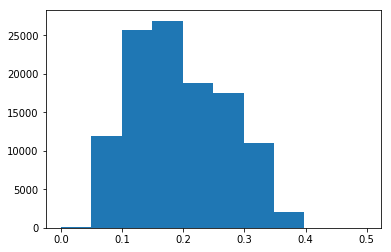

In [19]:
plt.hist(df.BorrowerRate);

BorrowerRate seems to be clean. Its value is between 0 and just under 0.5

### 4. LoanOriginalAmount

#### Define:

The LoanOriginalAmount is the amount of the actual loan in dollars.

In [20]:
df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()

(1000, 35000)

In [21]:
df.LoanOriginalAmount.isna().sum()

0

In [22]:
df.LoanOriginalAmount.dtype

dtype('int64')

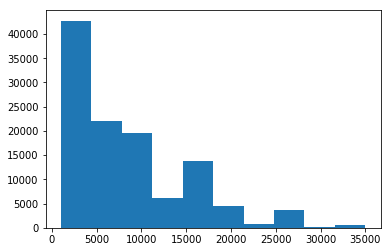

In [23]:
plt.hist(df.LoanOriginalAmount);

LoanOriginalAmount seems to be clean. It's value is between 1000 and 35000, with a majority being between 1000 and 5000.

### 5. StatedMonthlyIncome and IncomeRange

The StatedMonthlyIncome is the monthly income the borrower stated at the time the listing was created. IncomeRange is the stated annual income of the borrower.

In [24]:
df.StatedMonthlyIncome.isna().sum(), df.IncomeRange.isna().sum()

(0, 0)

In [25]:
len(df.query("StatedMonthlyIncome==0"))

1394

In [26]:
df.StatedMonthlyIncome.min(), df.StatedMonthlyIncome.max()

(0.0, 1750002.916667)

The max seems pretty high.

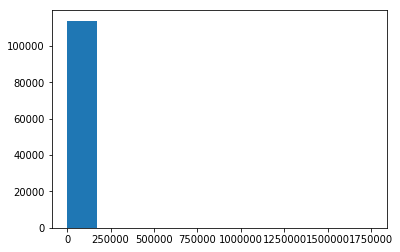

In [27]:
plt.hist(df.StatedMonthlyIncome);

Need to modify bin edges so that we can better see what is happening.

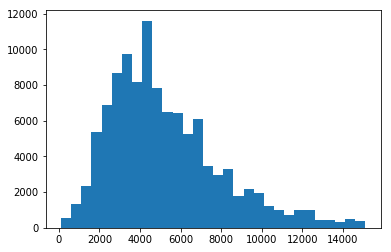

In [28]:
bin_edges = np.arange(100, 15000 + 500, 500)
plt.hist(df.StatedMonthlyIncome, bins = bin_edges);

Right skewed histogram as one would expect

In [29]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [30]:
df.query("IncomeRange == 'Not employed'")['StatedMonthlyIncome'].mean()

149.72684035483874

Let's check for inconsistencies between StatedMonthlyIncome and IncomeRange.

"$100,000+" equivalent to >= 8333.33 Monthly Income

"$75,000-99,999" equivalent to >=6250 and <8333.33

"$50,000-74,999" equivalent to >=4166.67 and <6250

"$25,000-49,999" equivalent to >=2083 and <41667.67

"$1-24,999" equivalent to >=1 and <2083

"$0" equivalent to 0

In [31]:
#Looking at the $100,000+ bracket.
df.query("StatedMonthlyIncome>=8333")['IncomeRange'].value_counts()

$100,000+         17306
Not displayed       840
$75,000-99,999       39
$50,000-74,999        5
Not employed          2
$25,000-49,999        1
$1-24,999             1
Name: IncomeRange, dtype: int64

In [32]:
#Looking at the $75,000 - $99,999 bracket.
df.query("StatedMonthlyIncome>= 6250 & StatedMonthlyIncome < 8333")['IncomeRange'].value_counts()

$75,000-99,999    16849
Not displayed       824
$50,000-74,999       72
$100,000+            22
$25,000-49,999        1
Not employed          1
Name: IncomeRange, dtype: int64

In [33]:
#Looking at the $50,000-74,999 bracket.
df.query("StatedMonthlyIncome>= 4166.67 & StatedMonthlyIncome < 6250")['IncomeRange'].value_counts()

$50,000-74,999    27622
Not displayed      1511
$25,000-49,999       53
$75,000-99,999       27
$100,000+             5
Not employed          1
$1-24,999             1
Name: IncomeRange, dtype: int64

In [34]:
#Looking at the $25,000-49,999 bracket.
df.query("StatedMonthlyIncome>= 2083 & StatedMonthlyIncome < 4166.67")['IncomeRange'].value_counts()

$25,000-49,999    32124
$50,000-74,999     3350
Not displayed      3193
$1-24,999            17
Not employed         13
$100,000+             2
$75,000-99,999        1
Name: IncomeRange, dtype: int64

In [35]:
#Looking at the $1-24,999 bracket.
df.query("StatedMonthlyIncome>= 1 & StatedMonthlyIncome < 2083")['IncomeRange'].value_counts()

$1-24,999         7113
Not displayed     1241
Not employed        41
$25,000-49,999      12
Name: IncomeRange, dtype: int64

In [36]:
#Looking at the $0 bracket
df.query("StatedMonthlyIncome == 0")['IncomeRange'].value_counts()

Not employed     726
$0               620
Not displayed     46
$1-24,999          2
Name: IncomeRange, dtype: int64

You can see that there are inconsistencies between StatedMonthlyIncome and IncomeRange.

#### Define:

Since we cannot confirm the IncomeRange for "Not Diplayed" I will delete those. This account for 7741 records which is less than 7% of the records.

For the StatedMonthlyIncome that does not match the IncomeRange, I will delete those. This accounts for less than 5% of the records.

I will keep the "Not employed" even if they earn a monthly income, as these could include individuals that are retired.

I will create data frame by using query which keep the verified entires and then I will concat them together.

#### Code:

In [37]:
#delete "Not Displayed" rows
df = df[df.IncomeRange != 'Not displayed']

#### Test:

In [38]:
#"Not Displayed" should not be shown
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

#### Code:

In [39]:
#Rows consistent at the $100,000+ bracket.
a= df.query("StatedMonthlyIncome>=8333 & IncomeRange == '$100,000+'")

In [40]:
#Rows consistent at the $75,000 - $99,999 bracket.
b = df.query("StatedMonthlyIncome>= 6250 & StatedMonthlyIncome < 8333 & IncomeRange == '$75,000-99,999' ")

In [41]:
#Rows consistent at the $50,000-74,999 bracket.
c= df.query("StatedMonthlyIncome>= 4166.67 & StatedMonthlyIncome < 6250 & IncomeRange== '$50,000-74,999'")

In [42]:
#Rows consistent at the $25,000-49,999 bracket.
d= df.query("StatedMonthlyIncome>= 2083 & StatedMonthlyIncome < 4166.67 & IncomeRange == '$25,000-49,999'")

In [43]:
#Rows consistent at the $1-24,999 bracket.
e= df.query("StatedMonthlyIncome>= 1 & StatedMonthlyIncome < 2083 & IncomeRange == '$1-24,999'")

In [44]:
#Rows consistent at the $0 bracket.
f=df.query("StatedMonthlyIncome == 0 & IncomeRange == '$0'")

In [45]:
#Rows consistent at the Not employed bracket.
g=df.query("IncomeRange == 'Not employed'")

In [46]:
s = pd.concat([a,b,c,d,e,f,g])
s.shape

(102440, 81)

#### Test:

In [47]:
#Looking at the $100,000+ bracket.
s.query("StatedMonthlyIncome>=8333")['IncomeRange'].value_counts()

$100,000+       17306
Not employed        2
Name: IncomeRange, dtype: int64

In [48]:
#Looking at the $75,000 - $99,999 bracket.
s.query("StatedMonthlyIncome>= 6250 & StatedMonthlyIncome < 8333")['IncomeRange'].value_counts()

$75,000-99,999    16849
Not employed          1
Name: IncomeRange, dtype: int64

In [49]:
#Looking at the $50,000-74,999 bracket.
s.query("StatedMonthlyIncome>= 4166.67 & StatedMonthlyIncome < 6250")['IncomeRange'].value_counts()

$50,000-74,999    27622
Not employed          1
Name: IncomeRange, dtype: int64

In [50]:
#Looking at the $25,000-49,999 bracket.
s.query("StatedMonthlyIncome>= 2083 & StatedMonthlyIncome < 4166.67")['IncomeRange'].value_counts()

$25,000-49,999    32124
Not employed         13
Name: IncomeRange, dtype: int64

In [51]:
#Looking at the $1-24,999 bracket.
s.query("StatedMonthlyIncome>= 1 & StatedMonthlyIncome < 2083")['IncomeRange'].value_counts()

$1-24,999       7113
Not employed      41
Name: IncomeRange, dtype: int64

In [52]:
#Looking at the $0 bracket
s.query("StatedMonthlyIncome == 0")['IncomeRange'].value_counts()

Not employed    726
$0              620
Name: IncomeRange, dtype: int64

In [53]:
df = s

### 6. IsBorrowerHomeOwner

#### Define: 

Borrower is classified as a Homeowner if they have mortgage on their profile and have documentation to prove it. True means they own a home; False means they do not. I will modify True to be 1 and False to be 0.

In [54]:
df.IsBorrowerHomeowner.value_counts()

True     53074
False    49366
Name: IsBorrowerHomeowner, dtype: int64

In [55]:
df.IsBorrowerHomeowner.isna().sum()

0

#### Code:

In [56]:
#replace True/False with 1/0
df["IsBorrowerHomeowner"].replace((True, False), (1, 0), inplace=True)

#### Test:

In [57]:
df.IsBorrowerHomeowner.value_counts()

1    53074
0    49366
Name: IsBorrowerHomeowner, dtype: int64

### 7. IncomeVerifiable

#### Define: Borrower has documentation to verify income.  True means they have the documentation; False means they do not. I will modify True to be 1 and False to be 0.

In [58]:
df.IncomeVerifiable.value_counts()

True     94393
False     8047
Name: IncomeVerifiable, dtype: int64

In [59]:
df.IncomeVerifiable.isna().sum()

0

#### Code:

In [60]:
#replace True/False with 1/0
df["IncomeVerifiable"].replace((True, False), (1, 0), inplace=True)

#### Test:

In [61]:
df.IncomeVerifiable.value_counts()

1    94393
0     8047
Name: IncomeVerifiable, dtype: int64

### 8. CurrentDelinquencies

#### Define: 

Number of accounts delinquent when credit was pulled. There are 697 values that are null. I will delete them using dropna function.

In [62]:
df.CurrentDelinquencies.isna().sum()

18

#### Code:

In [63]:
df = df.dropna(axis=0, subset=['CurrentDelinquencies'])

#### Test:

In [64]:
df.CurrentDelinquencies.isna().sum()

0

I might want to later make 3 categories. 0 if no deliquencies, 1 if one delinquency, 2 if more than one delinquency 

### 9. AmountDelinquent

Define: 

Dollars delinquent at time credit was pulled. There are 6925 null values. I will delete them using dropna function.

In [65]:
df.AmountDelinquent.isna().sum()

0

Code:

In [66]:
df = df.dropna(axis=0, subset=['AmountDelinquent'])

Test:

In [67]:
df.AmountDelinquent.isna().sum()

0

### 10. CreditScoreRangeLower

Define: 

CreditScoreRangeLower is the lower value representing the borrower's credit score. The max is 880, which is within the 900 range. 

In [68]:
df.CreditScoreRangeLower.isna().sum()

0

In [69]:
df.CreditScoreRangeLower.min(), df.CreditScoreRangeLower.max() 

(520.0, 880.0)

In [70]:
df.CreditScoreRangeLower.dtype

dtype('float64')

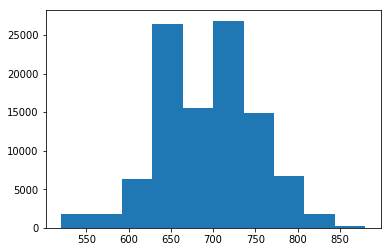

In [71]:
plt.hist(df.CreditScoreRangeLower);

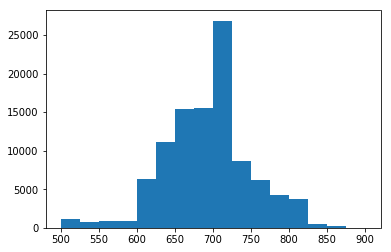

In [72]:
bin_edges = np.arange(500, 880 + 25, 25)
plt.hist(df.CreditScoreRangeLower, bins = bin_edges);

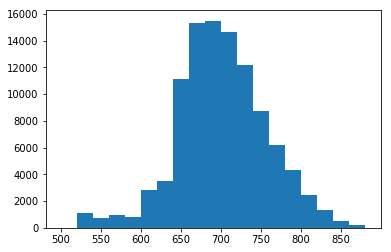

In [73]:
bin_edges = np.arange(500, 880 + 20, 20)
plt.hist(df.CreditScoreRangeLower, bins = bin_edges);

There's definitively something weird going on with the hist and bin sizes. I'll have to investigate further. Column looks pretty clean and does not need to be modified.

### 11. ListingCreationDate

#### Define:

It's type object and should be timestamp.

#### Code:

In [74]:
df.ListingCreationDate=pd.to_datetime(df.ListingCreationDate)

#### Test:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102422 entries, 4 to 113766
Data columns (total 81 columns):
ListingKey                             102422 non-null object
ListingNumber                          102422 non-null int64
ListingCreationDate                    102422 non-null datetime64[ns]
CreditGrade                            20227 non-null object
Term                                   102422 non-null int64
LoanStatus                             102422 non-null object
ClosedDate                             45565 non-null object
BorrowerAPR                            102422 non-null float64
BorrowerRate                           102422 non-null float64
LenderYield                            102422 non-null float64
EstimatedEffectiveYield                82066 non-null float64
EstimatedLoss                          82066 non-null float64
EstimatedReturn                        82066 non-null float64
ProsperRating (numeric)                82066 non-null float64
ProsperRating 

In [76]:
#Rename column to take space out
df.rename(columns = {"ProsperRating (numeric)" : "ProsperRatingNum"}, inplace = True)

There is still some missing data before 2009, so before analyzing the Propser Rating and Estimated return, I will need to query for the non null values. 

In [77]:
df.shape

(102422, 81)

In [78]:
#Copy the clean dataframe
loan_df = df.copy()

In [79]:
#Save clean dataframe to new csv file
loan_df.to_csv('loan_master.csv', encoding='utf-8', index=False)

<a id='uni'></a>
## Univariate Exploration

In this section I will look at the distributions, frequencies and key statistics of one variable at a time.

In [80]:
df.LoanStatus.value_counts()

Current                   54659
Completed                 32254
Chargedoff                10179
Defaulted                  3131
Past Due (1-15 days)        779
Past Due (31-60 days)       350
Past Due (61-90 days)       307
Past Due (91-120 days)      296
Past Due (16-30 days)       251
FinalPaymentInProgress      200
Past Due (>120 days)         15
Cancelled                     1
Name: LoanStatus, dtype: int64

In [81]:
x = df.LoanStatus.value_counts()

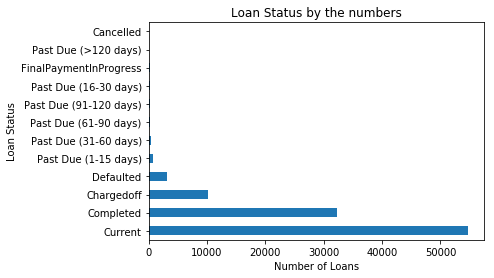

In [82]:
base_color = sb.color_palette()[0]
x.plot(kind = 'barh', color = base_color);
plt.xlabel('Number of Loans');
plt.title("Loan Status by the numbers");
plt.ylabel("Loan Status");

The majority of the loans are either current or completed, but the charged off and defaulted values are definitively concerning. About 53% of the loans are current, 32% are paid off and 15% are late, defaulted or charged off.

In [83]:
(len(df.LoanStatus) - len(df.query("LoanStatus == 'Current'")) - len(df.query("LoanStatus == 'Completed'"))- len(df.query("LoanStatus == 'FinalPaymentInProgress'")))/len(df.LoanStatus)

0.14946984046396283

In [84]:
len(df.query("LoanStatus == 'Current'")) /len(df.LoanStatus)

0.5336646423619925

In [85]:
(len(df.query("LoanStatus == 'Completed'"))+ len(df.query("LoanStatus == 'FinalPaymentInProgress'")))/len(df.LoanStatus)

0.31686551717404465

In [86]:
sorted_counts = [["Bad", 14.9], ["Current", 53.4], ["Completed", 31.7]]

In [87]:
loans_sorted = pd.DataFrame(sorted_counts, columns = ['Status', 'Percentage']) 
loans_sorted

,Status,Percentage
0,Bad,14.9
1,Current,53.4
2,Completed,31.7


Text(0.5, 1.0, 'Percent of loans sorted by status')

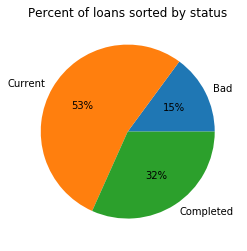

In [88]:
plt.pie(loans_sorted.Percentage, labels = loans_sorted.Status, autopct='%1.0f%%');
plt.title('Percent of loans sorted by status')

In [89]:
x = df.EstimatedReturn.mean()
y = df.EstimatedReturn.median()
x,y

(0.0960641227792234, 0.09167)

/Users/tina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


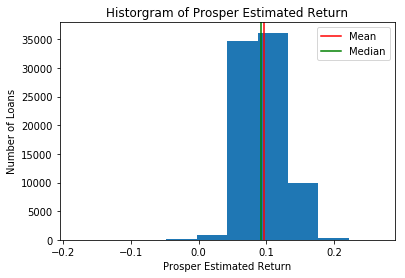

In [90]:
plt.hist(df.EstimatedReturn);
plt.xlabel('Prosper Estimated Return');
plt.title("Historgram of Prosper Estimated Return");
plt.ylabel("Number of Loans");
plt.axvline(x = x, color='r');
plt.axvline(x = y, color = 'g');
plt.legend(['Mean','Median'])

This histogram is nearly symmetrical. It's interesting that there are negative return estimates (189 loans which is less than 0.1%). Who would have funded these loans? The mean and median estimated return is just under 10%. The highest quality, safest, most stable dividend-paying stocks have tended to return 7% in real, inflation-adjusted returns to owners for centuries (according to https://www.thebalance.com/good-rate-roi-357326)

In [91]:
len(df.query("EstimatedReturn<0"))

189

In [92]:
df.query("EstimatedReturn<0")

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
4310,9E5E3498204991686FFFDC9,481925,2010-10-28 10:18:14.733,NaN,36,Completed,2011-05-13 00:00:00,0.34631,0.3100,0.3000,...,-31.49,0.00,0.00,0.00,0.00,1.0,0,0,0.00,75
4491,06C634936764915582779CD,474698,2010-09-07 07:57:07.080,NaN,36,Chargedoff,2013-05-18 00:00:00,0.37699,0.3400,0.3300,...,-123.99,0.00,2684.45,2684.45,0.00,1.0,0,0,0.00,37
6976,009B3495741061236C0C927,477848,2010-09-30 16:29:48.017,NaN,36,Completed,2013-10-14 00:00:00,0.38723,0.3500,0.3400,...,-106.13,0.00,0.00,0.00,0.00,1.0,0,0,0.00,80
7403,0A493500724918931BC92AD,485927,2010-11-28 10:26:41.450,NaN,36,Completed,2013-12-07 00:00:00,0.34631,0.3100,0.3000,...,-53.09,0.00,0.00,0.00,0.00,1.0,1,0,0.00,77
11134,16ED3472868394333E87B22,442499,2010-01-14 09:37:49.377,NaN,36,Completed,2013-01-19 00:00:00,0.11155,0.0906,0.0806,...,-162.60,0.00,0.00,0.00,0.00,1.0,0,0,0.00,1
25901,14A234652885522812E4A3F,426710,2009-10-02 09:53:09.680,NaN,36,Completed,2012-02-23 00:00:00,0.20392,0.1818,0.1718,...,-118.99,0.00,0.00,0.00,0.00,1.0,0,1,7000.00,1
28749,6908345927943412311C27E,420080,2009-08-10 12:20:39.970,NaN,36,Completed,2011-03-09 00:00:00,0.21223,0.1900,0.1800,...,-92.03,0.00,0.00,0.00,0.00,1.0,1,1,3000.00,8
35023,D18C3494152462675932D50,473631,2010-08-30 11:29:16.560,NaN,36,Completed,2010-12-09 00:00:00,0.32005,0.2600,0.2500,...,-2.34,0.00,0.00,0.00,0.00,1.0,0,0,0.00,47
37379,539A3467944215618FE956B,431327,2009-10-31 08:36:36.033,NaN,36,Completed,2011-03-16 00:00:00,0.20504,0.1829,0.1729,...,-69.73,0.00,0.00,0.00,0.00,1.0,1,0,0.00,35
38229,1200347740874323151AA1F,446616,2010-02-15 12:03:12.120,NaN,36,Completed,2011-10-18 00:00:00,0.37453,0.3500,0.3400,...,-45.11,0.00,0.00,0.00,0.00,1.0,0,0,0.00,48


In [93]:
df.EstimatedReturn.min(), df.EstimatedReturn.max(), df.EstimatedReturn.mean(), df.EstimatedReturn.median()

(-0.1827, 0.2667, 0.0960641227792234, 0.09167)

In [94]:
x = df.MonthlyLoanPayment.mean()
y = df.MonthlyLoanPayment.median()
x,y

(279.23585977625294, 229.14)

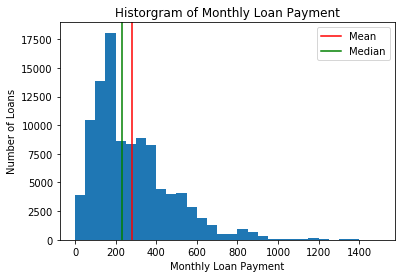

In [95]:
bin_edges = np.arange(0, 1500 + 50, 50)
plt.hist(df.MonthlyLoanPayment, bins = bin_edges);
plt.axvline(x = x, color='r');
plt.axvline(x = y, color = 'g');
plt.legend(['Mean','Median'])
plt.xlabel('Monthly Loan Payment');
plt.title("Historgram of Monthly Loan Payment");
plt.ylabel("Number of Loans");

The monthly loan payments histogram is right skewed. This is to be expected and doesn't tell me much.

In [96]:
x = df.BorrowerRate.mean()
y = df.BorrowerRate.median()
x,y

(0.19294948253302766, 0.183)

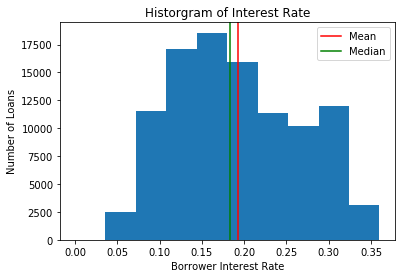

In [97]:
plt.hist(df.BorrowerRate);
plt.axvline(x = x, color='r');
plt.axvline(x = y, color = 'g');
plt.legend(['Mean','Median'])
plt.xlabel('Borrower Interest Rate');
plt.title("Historgram of Interest Rate");
plt.ylabel("Number of Loans");

The interest rate histogram is nearly symmetric and has almost the same mean and median (18%,19%). The range is pretty huge- between 5% and 35%. Most credit cards are not even as high as 30% which seems a bit predatory. Keep in mind that the average Estimated Return was at 10%, so Prosper is keeping the 8% difference.

In [98]:
x = df.CreditScoreRangeLower.mean()
y = df.CreditScoreRangeLower.median()
x,y

(691.4321141942161, 680.0)

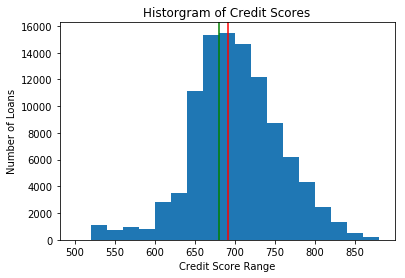

In [99]:
bin_edges = np.arange(500, 880 + 20, 20)
plt.hist(df.CreditScoreRangeLower, bins = bin_edges);
plt.xlabel('Credit Score Range');
plt.title("Historgram of Credit Scores");
plt.ylabel("Number of Loans");
plt.axvline(x = x, color='r');
plt.axvline(x = y, color = 'g');

Slightly right skewed. Keep in mind that a score below 550 is considered "bad" and between 550 and 620 is subprime. This is about 10,000 loans or 10%. There is a 7% decrease in borrower interest rate between someone with a score below 620 and above 620.

https://www.investopedia.com/articles/personal-finance/012215/how-bad-my-credit-score.asp

In [100]:
len(df.query("CreditScoreRangeLower <= 620"))

9884

In [101]:
df.query("CreditScoreRangeLower <= 620")['BorrowerRate'].mean()

0.252210683933624

In [102]:
df.query("CreditScoreRangeLower > 620")['BorrowerRate'].mean()

0.18661978322416653

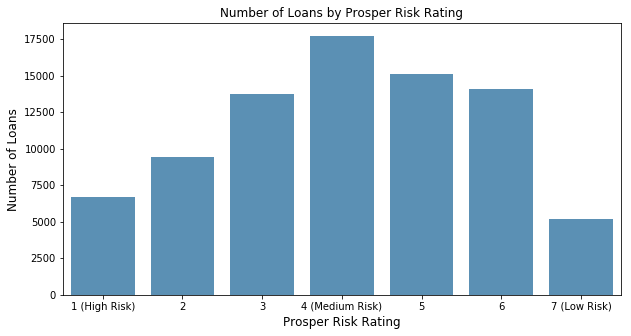

In [103]:
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = 'ProsperRatingNum', color = sb.color_palette()[0],alpha=0.8);
x = np.arange(7);
plt.xticks(x, ("1 (High Risk)", "2", "3", "4 (Medium Risk)","5","6", "7 (Low Risk)"));
plt.title('Number of Loans by Prosper Risk Rating');
plt.ylabel('Number of Loans', fontsize=12);
plt.xlabel('Prosper Risk Rating', fontsize=12); 

This looks like a fairly symmetric distribution. The Prosper Risk rating is one that Prosper calculated themselves, so it seems, this is the distribution they want.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were a extremely high monthly incomes. I thought it was interesting that the average Borrower Rate was around 19% and the Estimated Return was around 10%, meaning Prosper would pocket the difference.

The Risk rating was nearly symmetrical. Credit scores are slightly right skewed with a mean of 691.

I did not perform any translations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The main change I made to the data set was verifying the Monthly Income with the Annual Salary bracket. I deleted those that were not confirmed in the range. Additionally, I only wanted to know whether loans were Charged off or not, rather than the month they were charged off. I also modified any boolean columns to 0/1 so that regressive analysis can be performed.

I lumped together late, defaulted, cancelled and charged off loans into a "bad category" and compared it to current and completed (aka paid in full) loans. I did not perform any transformations on the data.

<a id='bi'></a>
## Bivariate Exploration

Before exploring two variables in detail, I ran a correlation matrix to help me identify the most correlated variables.

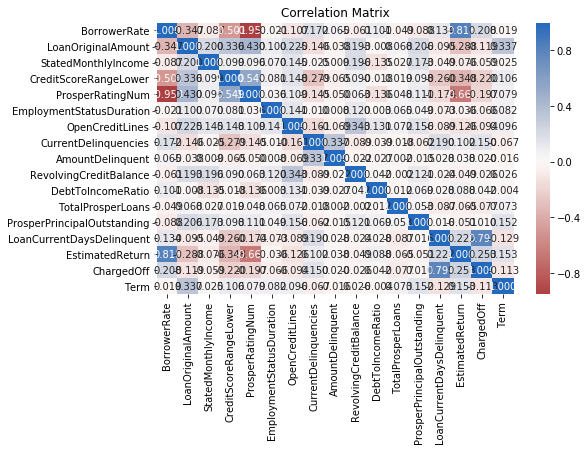

In [104]:
# correlation plot
numeric_vars = ['BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'CreditScoreRangeLower', 'ProsperRatingNum', 'EmploymentStatusDuration', 'OpenCreditLines', 'CurrentDelinquencies', 'AmountDelinquent', 'RevolvingCreditBalance', 'DebtToIncomeRatio', 'TotalProsperLoans', 'ProsperPrincipalOutstanding', 'LoanCurrentDaysDelinquent', 'EstimatedReturn', 'ChargedOff', 'Term']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix with correlations +/- 0.5')

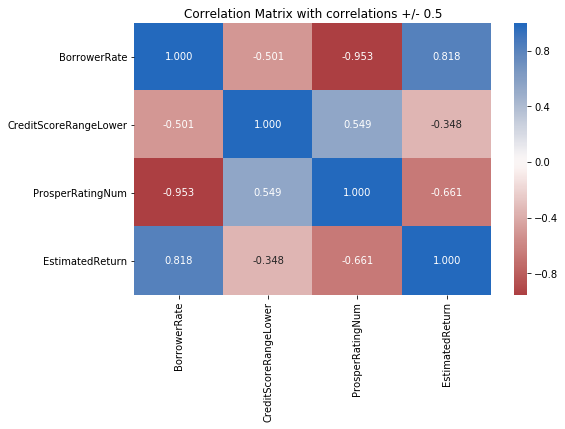

In [105]:
# correlation plot more closely at those that are correlated above/ below 0.5
numeric_vars = ['BorrowerRate', 'CreditScoreRangeLower', 'ProsperRatingNum', 'EstimatedReturn'];
plt.figure(figsize = [8, 5]);
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title("Correlation Matrix with correlations +/- 0.5")

A strong correlation would be values between 0.7 and 1 (or -.7 and 1). A good rule of thumb is to not do regression analysis less than +/-0.5. This is unfortuate as we only have a few variable about 0.5 (Prosper Rating, Borrower Rate, Credit Score (barely), and Estimated Return.

/Users/tina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/tina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


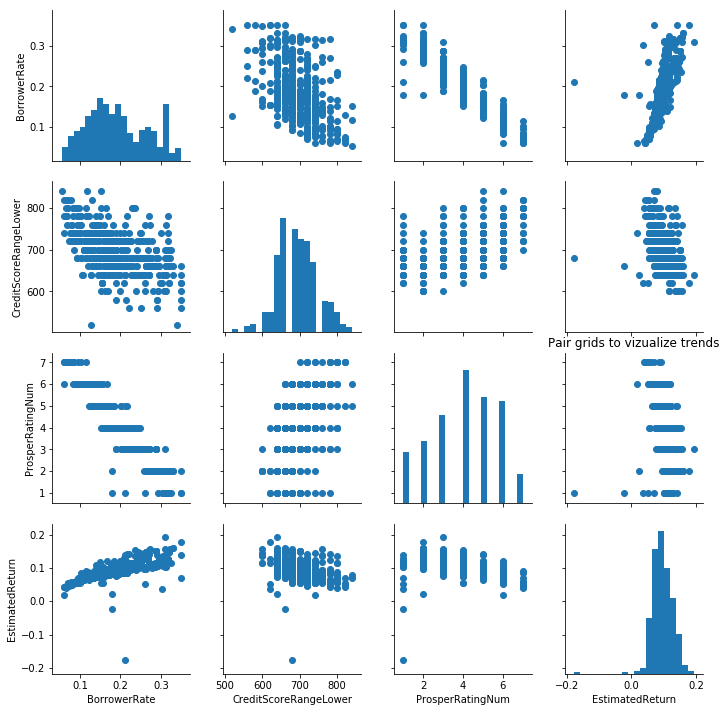

In [106]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
plt.title("Pair grids to vizualize trends");

Viziualiziation of correlation. You can see that the trends for Credit Score are less clear. A low Prosper Rating (High risk) is linearly and negatively correlated with their Borrow Rate.

#### Credit Score versus charge off

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


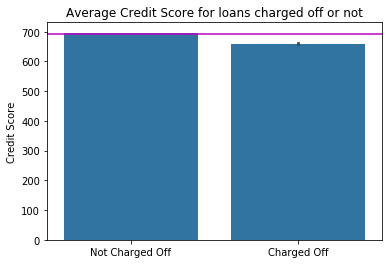

In [107]:
base_color = sb.color_palette()[0]
ax = sb.barplot(x="ChargedOff", y="CreditScoreRangeLower", data=df, color = base_color);
plt.title("Average Credit Score for loans charged off or not");
plt.ylabel("Credit Score");
plt.axhline(y=df.CreditScoreRangeLower.mean(), color='m', linestyle='-');
x = np.arange(2);
plt.xticks(x, ('Not Charged Off', 'Charged Off'));
plt.xlabel('');

There is only a 37 point difference bewtween credit score if a loan was charged off or not. This doesn't really tell us that much so let's look at a voilin plot.

In [108]:
df.query("ChargedOff == 0")["CreditScoreRangeLower"].mean()- df.query("ChargedOff == 1")["CreditScoreRangeLower"].mean()

36.96281717391719

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


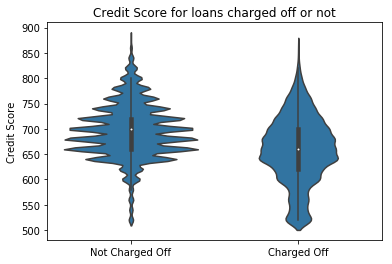

In [109]:
sb.violinplot(data = df, x = "ChargedOff", y = "CreditScoreRangeLower", color = base_color);
x = np.arange(2);
plt.xticks(x, ('Not Charged Off', 'Charged Off'))
plt.xlabel('');
plt.title("Credit Score for loans charged off or not");
plt.ylabel("Credit Score");

In [110]:
df.query("ChargedOff ==1")["CreditScoreRangeLower"].median()

660.0

Here we can see that more people with lower credit scores charge off, however I'm suprised to see that the majority had a score between 650 and 700, which is the same range for te largest group that did not charged off.

#### Charged off versus Loan amount

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


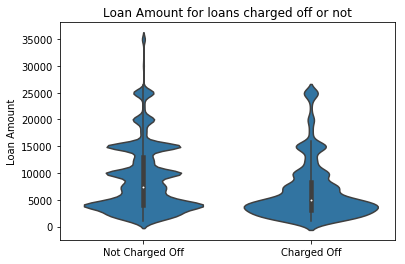

In [111]:
sb.violinplot(data = df, x = "ChargedOff", y = "LoanOriginalAmount", color = base_color);
x = np.arange(2);
plt.xticks(x, ('Not Charged Off', 'Charged Off'))
plt.xlabel('');
plt.title("Loan Amount for loans charged off or not");
plt.ylabel("Loan Amount");

The shape of the voilin plot for loan amount for charged off and not charged off accounts is similar. Yet the average loan amount for a charged off loan is $2250 less than one that is not charged off. 

In [112]:
df.query("ChargedOff ==1")["LoanOriginalAmount"].mean(), df.query("ChargedOff ==1")["LoanOriginalAmount"].median()

(6635.348121835084, 5000.0)

In [113]:
df.query("ChargedOff ==0")["LoanOriginalAmount"].mean(), df.query("ChargedOff ==0")["LoanOriginalAmount"].median()

(8870.95595968203, 7350.0)

#### Loan amount versus Term length

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


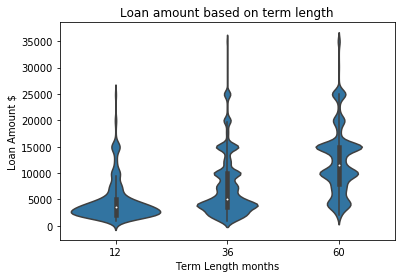

In [114]:
sb.violinplot(data = df, x = "Term", y = "LoanOriginalAmount", color = base_color);
plt.title("Loan amount based on term length");
plt.ylabel("Loan Amount $");
plt.xlabel("Term Length months");

As expected, when the loan is less, the term is also shorter. 

#### Credit Score versus Borrower Rate

Since the credit scores are only every 10, I need to add jitter to the image

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


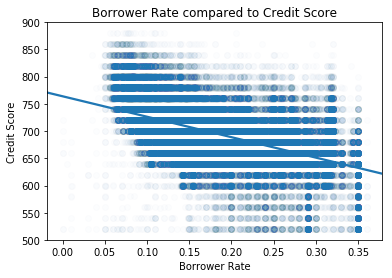

In [115]:
sb.regplot(data = df, x = "BorrowerRate", y = "CreditScoreRangeLower", y_jitter = .3, scatter_kws = {'alpha': 1/100});
plt.title("Borrower Rate compared to Credit Score");
plt.ylabel("Credit Score");
plt.xlabel("Borrower Rate");

As expected, the higher the credit score, the lower the interest rate.

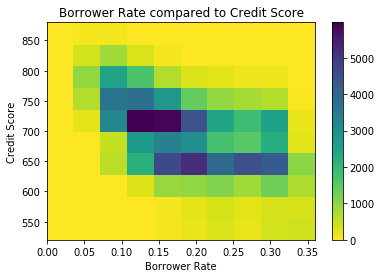

In [116]:
plt.hist2d(data = df, x = "BorrowerRate", y = "CreditScoreRangeLower", cmap = 'viridis_r');
plt.colorbar();
plt.title("Borrower Rate compared to Credit Score");
plt.ylabel("Credit Score");
plt.xlabel("Borrower Rate");

Credit Score below 630 seem to have less of an influnce on borrower rate. One would expect that the rate would decrease in the 550 to 600 range, but it seems to stay flat. The borrower rate also based on the federal reserve level which is not taken into consideration here.

#### Income versus loan amount

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


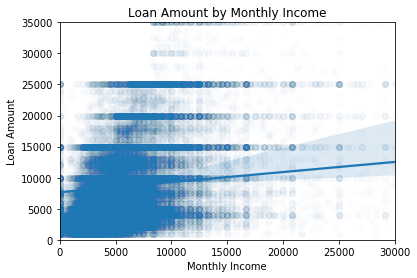

In [117]:
sb.regplot(data = df, x = "StatedMonthlyIncome", y = "LoanOriginalAmount", y_jitter = .1, scatter_kws = {'alpha': 1/100});
plt.xlim(0, 30000);
plt.ylim(0, 35000);
plt.title("Loan Amount by Monthly Income");
plt.ylabel("Loan Amount");
plt.xlabel("Monthly Income");

This tells us that the highter the monthly income, the larger the loan amount you can be  funded for. It appears that most loans are in  `$`5000 intervals. If you make below around  `$`8000 a month, you cannot qualify for a loan over `$ `25000

In [118]:
df.LoanOriginalAmount.mean(), df.LoanOriginalAmount.median()

(8582.15738806116, 7000.0)

In [119]:
df.StatedMonthlyIncome.mean(), df.StatedMonthlyIncome.median()

(5728.906418209445, 4916.666667)

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


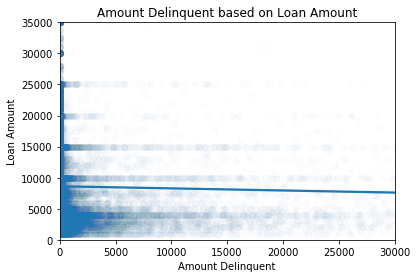

In [120]:
sb.regplot(data = df, x = "AmountDelinquent", y = "LoanOriginalAmount", y_jitter = .1, scatter_kws = {'alpha': 1/100});
plt.xlim(0, 30000);
plt.ylim(0, 35000);
plt.title("Amount Delinquent based on Loan Amount");
plt.ylabel("Loan Amount");
plt.xlabel("Amount Delinquent");

Some borrowers had large amounts delinquencies when applying for loan. 15% of borrowers had delinquencies.

In [121]:
# percentage of borrowers with delinqent amounts
len(df.query("AmountDelinquent >0"))/len(df.AmountDelinquent)

0.15454687469488976

In [122]:
#mean and median amount delinquent if they ChargedOff
df.query("ChargedOff == 1")["AmountDelinquent"].mean()- df.query("ChargedOff == 0")["AmountDelinquent"].mean()

437.47095835897903

In [123]:
#sb.countplot(data = df, x = "AmountDelinquent", hue = "ChargedOff");

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


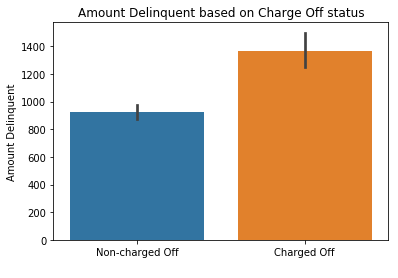

In [124]:
sb.barplot(data = df, x = "ChargedOff", y = "AmountDelinquent");
plt.title("Average amount delinquent");
plt.title("Amount Delinquent based on Charge Off status");
plt.ylabel("Amount Delinquent");
plt.xlabel(" ");
x = np.arange(2);
plt.xticks(x, ('Non-charged Off', 'Charged Off'));

Borrowers that end up charging off are deliquent at the start of the loan `$ 438` more than those that do not charge off. `15%` of borrowers had a delinquent amount.

/Users/tina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


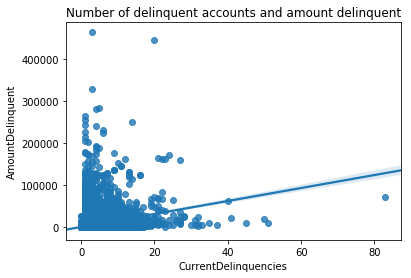

In [125]:
sb.regplot(data = df, x = "CurrentDelinquencies", y ="AmountDelinquent");
plt.title("Number of delinquent accounts and amount delinquent");

The more delinquent accounts, the higher dollar amount of delinquencies.

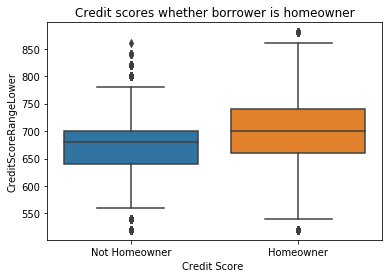

In [126]:
sb.boxplot(data = df, x = "IsBorrowerHomeowner", y ="CreditScoreRangeLower");
plt.title("Credit scores whether borrower is homeowner");
plt.xlabel(" ");
plt.xlabel("Credit Score ");
x = np.arange(2);
plt.xticks(x, ('Not Homeowner', 'Homeowner'));

Homeowners had higher credit scores by about 30 points on average.

In [127]:
df.query("IsBorrowerHomeowner == 1")["CreditScoreRangeLower"].mean(), df.query("IsBorrowerHomeowner == 0")["CreditScoreRangeLower"].mean() 

(707.2849229377849, 674.3823457890898)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most of the variables were not correlated and had a lot of variability. I thought that Credit Score would be a good indicator whether a borrower charged off or not and it turns out not to be. 

> A lower Prosper Rating (High risk) is correlated with a higher interest rate and higher return.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A homeowner had a credit score that was 35 points higher than one who did not own a home.Borrowers that end up charging off are deliquent at the start of the loan `$ 438` more than those that do not charge off.

<a id='multi'></a>
## Multivariate Exploration

> The tricky part about this data set, is that numerically there were already only a few  variables that had correlation (Prosper Rating, Estimated Return, Credit Score and Borrower Rate and previous regressions indicated multicollinearity. But I was hoping to find a indicators for Charged Off accounts, so I still want to try a Logistic Regression.

In [128]:
#Logistic regression- categorical vs independent
df['intercept']=1
logit_mod=sm.Logit(df['ChargedOff'],df[['intercept','CurrentDelinquencies', 'CreditScoreRangeLower']])
results= logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.358769
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ChargedOff   No. Observations:               102422
Model:                          Logit   Df Residuals:                   102419
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 May 2019   Pseudo R-squ.:                 0.06771
Time:                        20:57:03   Log-Likelihood:                -36746.
converged:                       True   LL-Null:                       -39415.
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 5.3809      0.124     43.264      0.000       5.137       5.625
CurrentDelinquencies      0.0933      0.005     18.252      0.000       0.083       0.103
CreditScoreRangeLower    -0.0108      0.000    -58.850      0.000      -0.011      -0.010
=========================================================================================
"""

In [129]:
np.exp(.0933), np.exp(-.0108)

(1.0977910231793795, 0.9892581106136482)

In [130]:
1/np.exp(-.0108)

1.010858530520097

The relationship here is weak. The p-value is zero The results are telling us that  an account will be 1.1 times as likely to be charged off with a one unit increase in Current Delinquencies.

In [131]:
df["Year"] = df.ListingCreationDate.dt.year

In [132]:
df.Year.value_counts()

2013    34168
2012    18976
2011    11091
2008    10935
2014    10367
2007     9393
2010     5360
2009     2132
Name: Year, dtype: int64

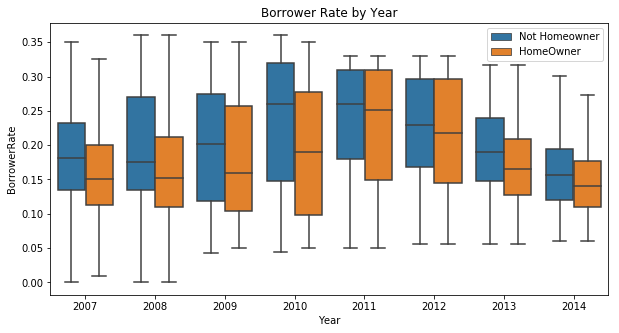

In [133]:
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize = [10, 5])
g = sb.boxplot(data=df, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner', showfliers=False);
plt.title("Borrower Rate by Year");
L = plt.legend()
L.get_texts()[0].set_text('Not Homeowner');
L.get_texts()[1].set_text('HomeOwner');

The highest Borrower Rate average was in 2011. Homeowners tended to have a lower borrower rate than those that did not own a home.

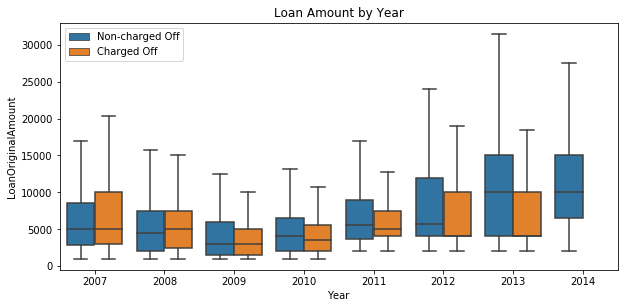

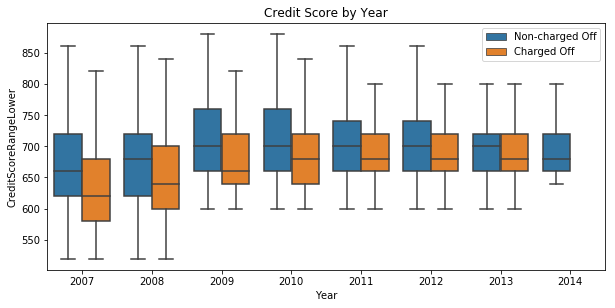

In [134]:
plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 1)
g = sb.boxplot(data=df, x='Year', y='LoanOriginalAmount', hue='ChargedOff', showfliers=False);
plt.title("Loan Amount by Year");
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off'); 

plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 2)
g = sb.boxplot(data=df, x='Year', y='CreditScoreRangeLower', hue='ChargedOff', showfliers=False);
plt.title("Credit Score by Year");
L = plt.legend()
L.get_texts()[0].set_text('Non-charged Off');
L.get_texts()[1].set_text('Charged Off'); 

Average loan amounts bottomed out in 2009 and steadily increased after that. Credit scores had a different trend. The increased until 2010 and then flattened out. Generally, borrowers that don't charge off have a higher credit score than those that charge off. The box plot allows you to see the range in credit scores and loan amounts.

One issue with the data presented is it appears that there a lower number of charged off accounts in later year because those terms have not completed. There are zero charged off accounts in 2014 as the last date in the data set is March. It usually takes at least 6 months for an account to charge off, so there would also be fewer chargeoffs in 2013.

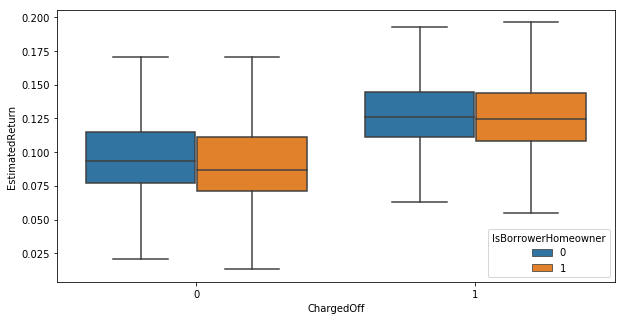

In [135]:
plt.figure(figsize = [10, 5])
g = sb.boxplot(data=df, x='ChargedOff', y='EstimatedReturn', hue='IsBorrowerHomeowner',showfliers=False);

Homeownership of the Borrower plays little roll the in Estimated Loan Return amount. Charged off accounts have a higher Estimated return (as to be expected with a risker loan). In a previous graph you saw that non-homeowners tended to have higher borrow rates. One would think that would translate into higher estimated return, but the return is nearly equal here between homeowners and non-homeowners.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  Generally, borrowers that don't charge off have a higher credit score than those that charge off. The average credit score has been increasing in addition to loan amounts.

### Were there any interesting or surprising interactions between features?

> Not owning a home seemed to give the borrower a higher rate, however this did not translate into a higher estimated return for the investors.